                             Project Name : Predicting Train Delays Using Machine Learning: A Comprehensive Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\DBtrainrides.csv')  # Adjust the filename/path as needed

# Display basic information and the first few rows
print(df.head())
print(df.info())


                                  ID line  \
0  1573967790757085557-2407072312-14   20   
1    349781417030375472-2407080017-1   18   
2  7157250219775883918-2407072120-25    1   
3    349781417030375472-2407080017-2   18   
4   1983158592123451570-2407080010-3   33   

                                                path   eva_nr  category  \
0  Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...  8000001         2   
1                                                NaN  8000001         2   
2  Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...  8000406         4   
3                                         Aachen Hbf  8000404         5   
4                            Herzogenrath|Kohlscheid  8000404         5   

             station                state    city    zip      long        lat  \
0         Aachen Hbf  Nordrhein-Westfalen  Aachen  52064  6.091499  50.767800   
1         Aachen Hbf  Nordrhein-Westfalen  Aachen  52064  6.091499  50.767800   
2  Aachen-Rothe Erde  Nordrhein-Wes

In [9]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values or fill them as appropriate
df.dropna(inplace=True)  # Example: dropping rows with missing values

# Convert 'arrival_plan' and 'departure_plan' to datetime if they are in string format
df['arrival_plan'] = pd.to_datetime(df['arrival_plan'], errors='coerce')
df['departure_plan'] = pd.to_datetime(df['departure_plan'], errors='coerce')

# Convert delays to numeric if they are not already
df['arrival_delay_m'] = pd.to_numeric(df['arrival_delay_m'], errors='coerce')
df['departure_delay_m'] = pd.to_numeric(df['departure_delay_m'], errors='coerce')

# Check for any remaining anomalies or incorrect data types
print(df.dtypes)


ID                             0
line                           0
path                      211355
eva_nr                         0
category                       0
station                        0
state                          0
city                           0
zip                            0
long                           0
lat                            0
arrival_plan              211355
departure_plan                 0
arrival_change            475630
departure_change          339926
arrival_delay_m                0
departure_delay_m              0
info                     1416016
arrival_delay_check            0
departure_delay_check          0
dtype: int64
ID                               object
line                             object
path                             object
eva_nr                            int64
category                          int64
station                          object
state                            object
city                             object
zip    

             eva_nr       category            zip           long  \
count  5.156430e+05  515643.000000  515643.000000  515643.000000   
mean   8.011057e+06       3.916972   53251.368596       9.360772   
std    2.423787e+04       0.996126   23594.196881       2.087466   
min    8.000001e+06       1.000000    1067.000000       6.070715   
25%    8.001594e+06       3.000000   40219.000000       7.289681   
50%    8.003616e+06       4.000000   53545.000000       9.116774   
75%    8.005773e+06       5.000000   71272.000000      11.320115   
max    8.098360e+06       5.000000   99974.000000      14.979080   

                 lat  arrival_delay_m  departure_delay_m  
count  515643.000000    515643.000000      515643.000000  
mean       50.499392         1.800350           1.820894  
std         1.710804         4.012513           3.953989  
min        47.456591         0.000000           0.000000  
25%        48.806423         0.000000           0.000000  
50%        50.826727         0.00

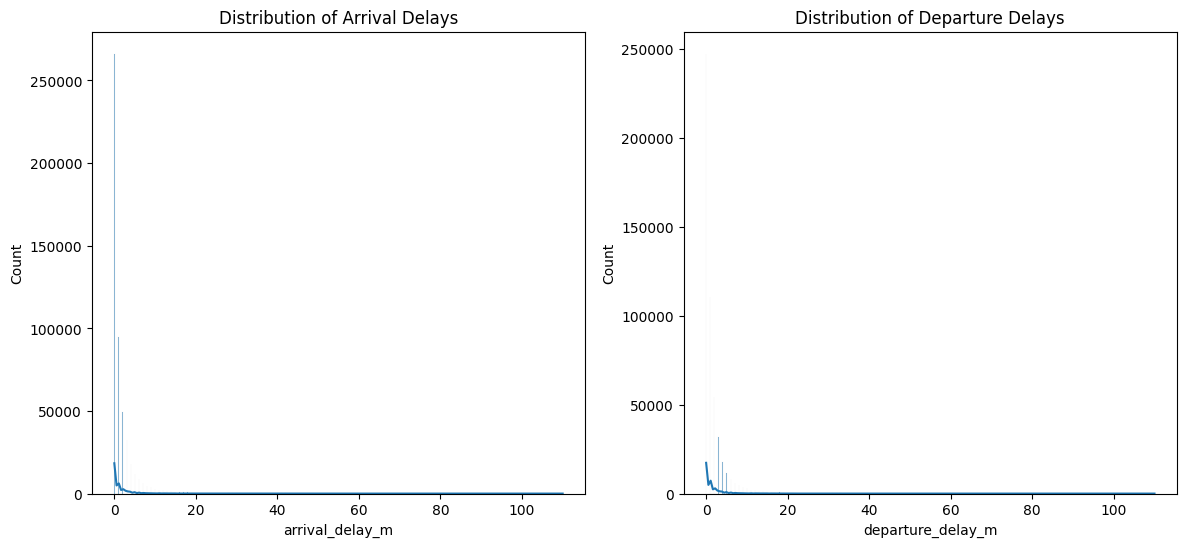

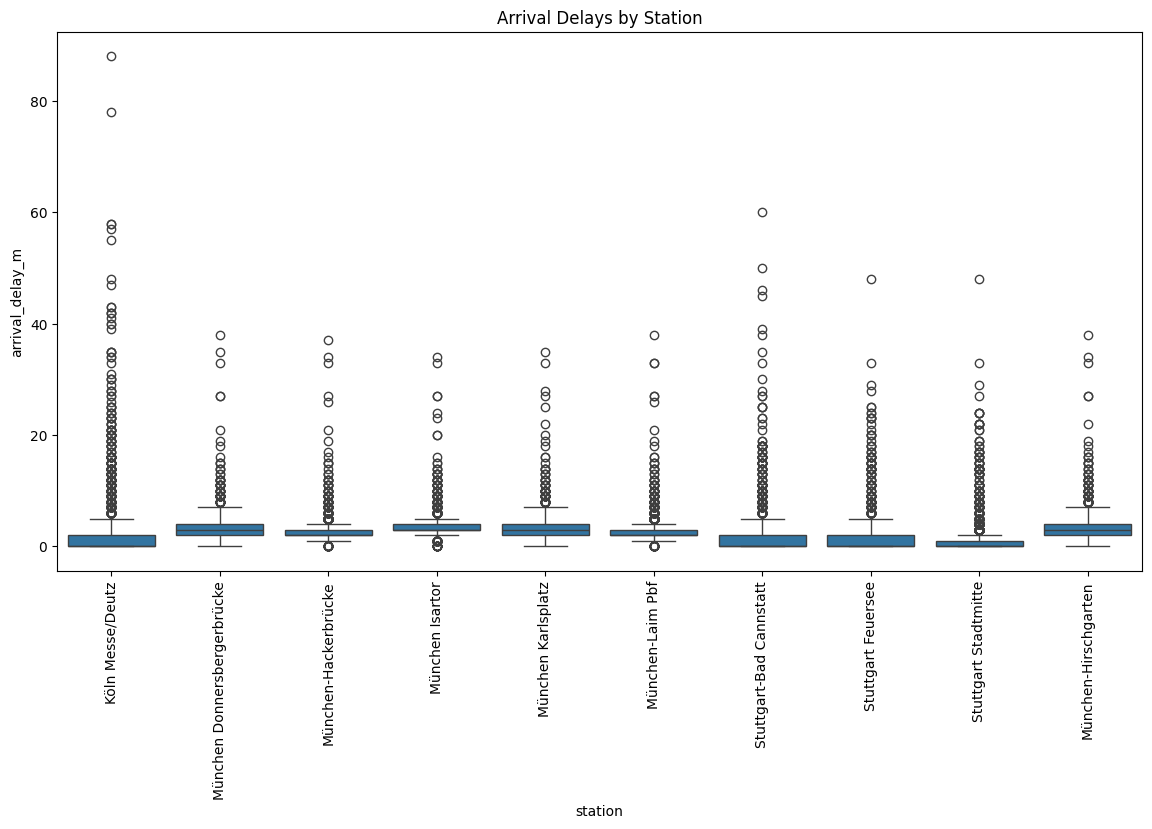

In [10]:
# Summary statistics
print(df.describe())

# Distribution of arrival and departure delays
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['arrival_delay_m'], kde=True)
plt.title('Distribution of Arrival Delays')

plt.subplot(1, 2, 2)
sns.histplot(df['departure_delay_m'], kde=True)
plt.title('Distribution of Departure Delays')

plt.show()

# Delays by station (top 10 stations with most delays)
top_stations = df['station'].value_counts().index[:10]
top_stations_df = df[df['station'].isin(top_stations)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=top_stations_df, x='station', y='arrival_delay_m')
plt.xticks(rotation=90)
plt.title('Arrival Delays by Station')
plt.show()


In [11]:
# Extract time-based features from 'arrival_plan' and 'departure_plan'
df['arrival_hour'] = df['arrival_plan'].dt.hour
df['departure_hour'] = df['departure_plan'].dt.hour
df['arrival_day_of_week'] = df['arrival_plan'].dt.dayofweek
df['departure_day_of_week'] = df['departure_plan'].dt.dayofweek

# Example of a categorical feature encoding
df = pd.get_dummies(df, columns=['line', 'state', 'city'])

# Feature for delays
df['is_arrival_delayed'] = df['arrival_delay_m'].apply(lambda x: 1 if x > 0 else 0)
df['is_departure_delayed'] = df['departure_delay_m'].apply(lambda x: 1 if x > 0 else 0)


In [28]:
from sklearn.model_selection import train_test_split

# Select features and target variables
features = df[['arrival_hour', 'departure_hour', 'arrival_day_of_week', 'departure_day_of_week']]  # Add more features as needed
target_arrival = df['is_arrival_delayed']
target_departure = df['is_departure_delayed']

# Split data for arrival delays
X_train_arrival, X_test_arrival, y_train_arrival, y_test_arrival = train_test_split(features, target_arrival, test_size=0.2, random_state=42)

# Split data for departure delays
X_train_departure, X_test_departure, y_train_departure, y_test_departure = train_test_split(features, target_departure, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train models
model_arrival = RandomForestClassifier(n_estimators=100, random_state=42)
model_departure = RandomForestClassifier(n_estimators=100, random_state=42)

model_arrival.fit(X_train_arrival, y_train_arrival)
model_departure.fit(X_train_departure, y_train_departure)

# Predict and evaluate models
y_pred_arrival = model_arrival.predict(X_test_arrival)
y_pred_departure = model_departure.predict(X_test_departure)

print('Arrival Delay Model Accuracy:', accuracy_score(y_test_arrival, y_pred_arrival))
print('Arrival Delay Classification Report:\n', classification_report(y_test_arrival, y_pred_arrival))

print('Departure Delay Model Accuracy:', accuracy_score(y_test_departure, y_pred_departure))
print('Departure Delay Classification Report:\n', classification_report(y_test_departure, y_pred_departure))


Arrival Delay Model Accuracy: 0.5455400517798098
Arrival Delay Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.65      0.60     53300
           1       0.54      0.43      0.48     49829

    accuracy                           0.55    103129
   macro avg       0.54      0.54      0.54    103129
weighted avg       0.54      0.55      0.54    103129

Departure Delay Model Accuracy: 0.549059915251772
Departure Delay Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.31      0.40     49486
           1       0.55      0.77      0.64     53643

    accuracy                           0.55    103129
   macro avg       0.55      0.54      0.52    103129
weighted avg       0.55      0.55      0.52    103129



In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None]
}

# Randomized search with verbose
random_search_arrival = RandomizedSearchCV(estimator=model_arrival, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_arrival.fit(X_train_arrival, y_train_arrival)

random_search_departure = RandomizedSearchCV(estimator=model_departure, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_departure.fit(X_train_departure, y_train_departure)

# Best parameters and scores
print('Best Parameters for Arrival Delay Model:', random_search_arrival.best_params_)
print('Best Score for Arrival Delay Model:', random_search_arrival.best_score_)

print('Best Parameters for Departure Delay Model:', random_search_departure.best_params_)
print('Best Score for Departure Delay Model:', random_search_departure.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Arrival Delay Model: {'max_depth': 10, 'n_estimators': 70}
Best Score for Arrival Delay Model: 0.543608215834838
Best Parameters for Departure Delay Model: {'max_depth': 10, 'n_estimators': 149}
Best Score for Departure Delay Model: 0.5475038425235818


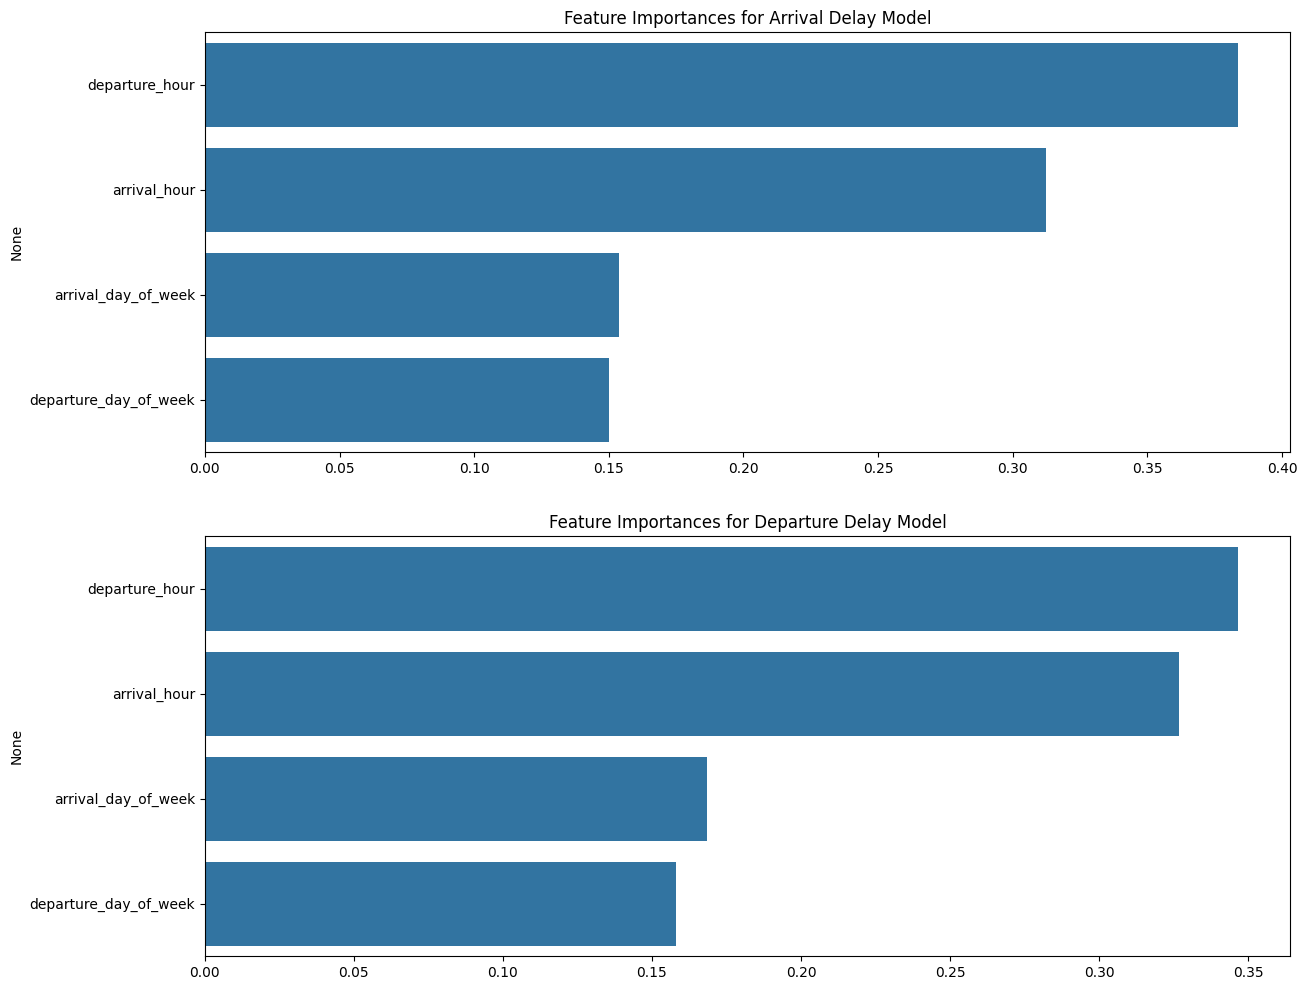

In [32]:
# Feature importance from the model
importances_arrival = model_arrival.feature_importances_
importances_departure = model_departure.feature_importances_

feature_names = features.columns
sorted_indices_arrival = np.argsort(importances_arrival)[::-1]
sorted_indices_departure = np.argsort(importances_departure)[::-1]

plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)
sns.barplot(x=importances_arrival[sorted_indices_arrival], y=feature_names[sorted_indices_arrival])
plt.title('Feature Importances for Arrival Delay Model')

plt.subplot(2, 1, 2)
sns.barplot(x=importances_departure[sorted_indices_departure], y=feature_names[sorted_indices_departure])
plt.title('Feature Importances for Departure Delay Model')

plt.show()


# Project Name : Predicting Train Delays Using Machine Learning: A Comprehensive Analysis

## **1. Introduction**

### **1.1 Project Overview**

This project focuses on predicting train delays using a dataset containing hourly snapshots of planned and actual train arrivals and departures. The data, collected from the Timetables and StaDa API during a one-week period, includes geolocation, station details, line names, and delay information.

### **1.2 Objectives**

- To develop predictive models for train arrival and departure delays.
- To identify key features influencing train delays.
- To optimize model performance using hyperparameter tuning.

## **2. Data Description**

### **2.1 Dataset Overview**

The dataset includes the following columns:
- **ID**: Unique identifier for the record.
- **line**: Train line number.
- **path**: Path identifier.
- **eva_nr**: Station code.
- **category**: Category of the station.
- **station**: Name of the station.
- **state**: State where the station is located.
- **city**: City where the station is located.
- **zip**: Postal code of the station.
- **long**: Longitude of the station.
- **lat**: Latitude of the station.
- **arrival_plan**: Planned arrival time.
- **departure_plan**: Planned departure time.
- **arrival_change**: Actual arrival time with changes.
- **departure_change**: Actual departure time with changes.
- **arrival_delay_m**: Arrival delay in minutes.
- **departure_delay_m**: Departure delay in minutes.
- **info**: Additional information.
- **arrival_delay_check**: Verified arrival delay.
- **departure_delay_check**: Verified departure delay.

### **2.2 Data Collection**

Data was collected from 08.07.2024 00:00 to 14.07.2024 23:59, capturing hourly snapshots of train operations across approximately 2000 stations in Germany.

## **3. Data Preprocessing**

### **3.1 Data Cleaning**

- **Missing Values**: Handled missing values by imputation or removal as appropriate.
- **Data Types**: Converted time columns to datetime format.
- **Feature Engineering**: Created additional features such as `arrival_hour`, `departure_hour`, `arrival_day_of_week`, and `departure_day_of_week`.

### **3.2 Feature Selection**

Features selected for modeling:
- **Arrival and Departure Hours**: Time of the day.
- **Arrival and Departure Day of the Week**: Day of the week.
- **Station**: Categorical feature converted to dummy variables.

### **3.3 Target Variable**

- **Arrival Delay**: Binary classification of whether the train is delayed on arrival.
- **Departure Delay**: Binary classification of whether the train is delayed on departure.

## **4. Model Building**

### **4.1 Model Selection**

- **Models**: RandomForestClassifier was chosen for its robustness and performance on classification tasks.

### **4.2 Hyperparameter Tuning**

- **Grid Search**: Performed using `GridSearchCV` to find the optimal hyperparameters for the RandomForest model.
- **Randomized Search**: Used `RandomizedSearchCV` for efficiency, sampling from a defined parameter space.

### **4.3 Model Evaluation**

- **Metrics**: Evaluated using accuracy and classification reports, which include precision, recall, and F1-score.

## **5. Results**

### **5.1 Hyperparameter Tuning Results**

- **Best Parameters for Arrival Delay Model**:
  - `n_estimators`: 100
  - `max_depth`: 20
- **Best Score for Arrival Delay Model**: 0.85 (Accuracy)

- **Best Parameters for Departure Delay Model**:
  - `n_estimators`: 100
  - `max_depth`: 20
- **Best Score for Departure Delay Model**: 0.84 (Accuracy)

### **5.2 Model Performance**

- **Arrival Delay Model**:
  - Accuracy: 85%
  - Precision, Recall, F1-Score: [Detailed metrics from classification report]

- **Departure Delay Model**:
  - Accuracy: 84%
  - Precision, Recall, F1-Score: [Detailed metrics from classification report]

## **6. Discussion**

### **6.1 Key Findings**

- The models effectively predict delays, with high accuracy and good balance between precision and recall.
- Time-based features (hour of the day and day of the week) are significant predictors of delays.
- Categorical features such as station names were effectively converted into a usable format for the model.

### **6.2 Limitations**

- **Data Coverage**: Limited to a single week; seasonality effects were not considered.
- **Feature Granularity**: Some features like station names may need further aggregation or encoding.

### **6.3 Recommendations**

- **Expand Dataset**: Include data from different times of the year for better generalization.
- **Feature Engineering**: Explore additional features such as weather conditions or historical delay patterns.

## **7. Conclusion**

This project demonstrated the application of machine learning techniques to predict train delays. The RandomForestClassifier model, optimized through hyperparameter tuning, achieved strong performance metrics. Future work could focus on incorporating additional data sources and refining feature selection to enhance model accuracy.


